# 🔬 Global `SARS-CoV-2` DNA Sequence Analysis
### 🦠 `3631` Sequences of Covid-19 on GenBank

Downloads avaliable from The National Library of Medicine [NCBI Virus](https://www.ncbi.nlm.nih.gov/labs/virus/vssi/#/virus?SeqType_s=Nucleotide&VirusLineage_ss=SARS-CoV-2,+taxid:2697049) resource.
1. Download all `fasta` nulcleotide sequences
2. Download `Current table view` csv for all sequence metadata 

Sequence data also available from the _China National Center for Bioinformation_ [CNCB](https://bigd.big.ac.cn/ncov/release_genome?lang=en#goto)

In [170]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 50
%matplotlib inline

from Bio.Seq import Seq
from Bio import SeqIO

#### 1. View NCBI Metadata

In [137]:
df = pd.read_csv('../data/NCBI_sequences_metadata.csv')
df.head(2)

,Accession,Release_Date,Species,Genus,Family,Length,Sequence_Type,Nuc_Completeness,Genotype,Segment,Authors,Publications,Geo_Location,Host,Isolation_Source,Collection_Date,BioSample,GenBank_Title
0,NC_045512,2020-01-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29903,RefSeq,complete,NaN,NaN,"Baranov,P.V., Henderson,C.M., Anderson,C.B., G...","15680415, 15630477, 10482585",China,Homo sapiens,NaN,2019-12,NaN,Severe acute respiratory syndrome coronavirus ...
1,MT459832,2020-05-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29818,GenBank,complete,NaN,NaN,"Kassela,K., Dovrolis,N., Bampali,M., Gatzidou,...",NaN,Greece: Athens,Homo sapiens,NaN,2020-03-24,NaN,Severe acute respiratory syndrome coronavirus ...


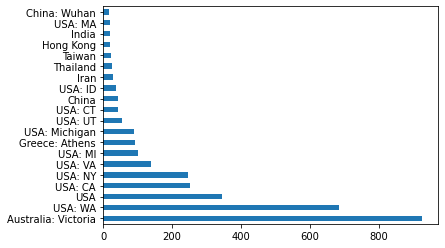

In [138]:
df.Geo_Location.value_counts().head(20).plot(kind='barh')

In [139]:
df.Host.value_counts()

Homo sapiens                3610
Mustela lutreola              13
Canis lupus familiaris         2
Felis catus                    2
Panthera tigris jacksoni       1
Name: Host, dtype: int64

* `Panthera Tigris Jacksoni` is a Malaysian Tiger from the Bronx Zoo in New York  
  
From WCS Newsroom
> On April 5, 2020, we reported that a four-year-old female Malayan tiger had tested positive for COVID-19. We can confirm that the **three other tigers in Tiger Mountain and the three African lions** that exhibited a cough have also **tested positive** for COVID-19.

#### 2. Parse Sequence Records

In [140]:
%%time
data = SeqIO.index("../data/SARS-CoV-2-sequences_v2.fasta", "fasta")
print(f'COVID-19 DNA Sequences: {len(data)}')

COVID-19 DNA Sequences: 3632
CPU times: user 953 ms, sys: 719 ms, total: 1.67 s
Wall time: 1.68 s


In [141]:
# Get accession
records = list(data)

for i, record in enumerate(records[:3]):
    print(f'\n{i}. \n{data[record].description}')
    


0. 
NC_045512 |Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1| complete genome|China|Homo sapiens|refseq| complete|Severe acute respiratory syndrome-related coronavirus

1. 
MT459832 |Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/GRC/34_36284/2020| complete genome|Greece|Homo sapiens|complete|Severe acute respiratory syndrome-related coronavirus

2. 
MT459833 |Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/GRC/43_35679/2020| complete genome|Greece|Homo sapiens|complete|Severe acute respiratory syndrome-related coronavirus


In [179]:
# Noteworthy records
patient_zero = 'NC_045512'
tiger_king = 'MT365033'
recent_cali = 'MT460092'

data[patient_zero].seq

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())

In [182]:
data[tiger_king].seq

Seq('GGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCT...AAA', SingleLetterAlphabet())

In [184]:
df[df.Accession.isin([patient_zero, tiger_king, recent_cali])]

,Accession,Release_Date,Species,Genus,Family,Length,Sequence_Type,Nuc_Completeness,Genotype,Segment,Authors,Publications,Geo_Location,Host,Isolation_Source,Collection_Date,BioSample,GenBank_Title
0,NC_045512,2020-01-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29903,RefSeq,complete,NaN,NaN,"Baranov,P.V., Henderson,C.M., Anderson,C.B., G...","15680415, 15630477, 10482585",China,Homo sapiens,NaN,2019-12,NaN,Severe acute respiratory syndrome coronavirus ...
106,MT460092,2020-05-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29857,GenBank,complete,NaN,NaN,"CZB Cliahub Consortium,C.C.C.",NaN,USA: CA,Homo sapiens,NaN,2020-05-01,NaN,Severe acute respiratory syndrome coronavirus ...
2125,MT365033,2020-04-24T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29897,GenBank,complete,NaN,NaN,"Mitchell,P., Anderson,R.R., Chilson,B., Venugo...",NaN,USA: New York,Panthera tigris jacksoni,"oronasopharynx, oronasopharynx",2020-04-02,NaN,Severe acute respiratory syndrome coronavirus ...


In [185]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from collections import Counter

In [195]:
# DNA to mRNA to Polypeptide (protein)
data[recent_cali].seq.transcribe().translate()

Seq('SQVTNQPTFDLL*ICSLNEL*NLCGCHSAACLVHSRSIINN*LLSLTGHE*LVY...NDK', HasStopCodon(ExtendedIUPACProtein(), '*'))

In [194]:
data[tiger_king].seq.transcribe().translate()

Seq('GLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTS...KKK', HasStopCodon(ExtendedIUPACProtein(), '*'))

In [209]:
# Create dataframe

In [208]:
df.head()

,Accession,Release_Date,Species,Genus,Family,Length,Sequence_Type,Nuc_Completeness,Genotype,Segment,Authors,Publications,Geo_Location,Host,Isolation_Source,Collection_Date,BioSample,GenBank_Title
0,NC_045512,2020-01-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29903,RefSeq,complete,NaN,NaN,"Baranov,P.V., Henderson,C.M., Anderson,C.B., G...","15680415, 15630477, 10482585",China,Homo sapiens,NaN,2019-12,NaN,Severe acute respiratory syndrome coronavirus ...
1,MT459832,2020-05-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29818,GenBank,complete,NaN,NaN,"Kassela,K., Dovrolis,N., Bampali,M., Gatzidou,...",NaN,Greece: Athens,Homo sapiens,NaN,2020-03-24,NaN,Severe acute respiratory syndrome coronavirus ...
2,MT459833,2020-05-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29818,GenBank,complete,NaN,NaN,"Kassela,K., Dovrolis,N., Bampali,M., Gatzidou,...",NaN,Greece: Athens,Homo sapiens,NaN,2020-03-20,NaN,Severe acute respiratory syndrome coronavirus ...
3,MT459834,2020-05-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29818,GenBank,complete,NaN,NaN,"Kassela,K., Dovrolis,N., Bampali,M., Gatzidou,...",NaN,Greece: Athens,Homo sapiens,NaN,2020-03-23,NaN,Severe acute respiratory syndrome coronavirus ...
4,MT459835,2020-05-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29818,GenBank,complete,NaN,NaN,"Kassela,K., Dovrolis,N., Bampali,M., Gatzidou,...",NaN,Greece: Athens,Homo sapiens,NaN,2020-03-23,NaN,Severe acute respiratory syndrome coronavirus ...


In [205]:
# Method 1
tk_analyised = ProteinAnalysis(str(data[tiger_king].seq.transcribe().translate()))


In [206]:
# Check for the Frequence of AA
tk_analyised.count_amino_acids()

{'A': 375,
 'C': 636,
 'D': 290,
 'E': 270,
 'F': 593,
 'G': 394,
 'H': 333,
 'I': 435,
 'K': 412,
 'L': 887,
 'M': 117,
 'N': 472,
 'P': 291,
 'Q': 324,
 'R': 557,
 'S': 810,
 'T': 679,
 'V': 548,
 'W': 263,
 'Y': 505}

In [430]:
# Method 2
from collections import Counter

# Find the Amino Acid Frequency
df['aa_freq'] = df.seq.apply(lambda s: Counter(s.translate()))
df

,name,seq,gc_content,proteins,len,aa_freq
0,COVID19,"(A, T, T, A, A, A, G, G, T, T, T, A, T, A, C, ...",37.972779,9967,29903,"{'I': 436, 'K': 413, 'G': 394, 'L': 886, 'Y': ..."
1,MERS,"(G, A, T, T, T, A, A, G, T, G, A, A, T, A, G, ...",41.236429,10039,30119,"{'D': 121, 'L': 1711, 'S': 852, 'E': 157, '*':..."
2,SARS,"(A, T, A, T, T, A, G, G, T, T, T, T, T, A, C, ...",40.761655,9917,29751,"{'I': 566, 'L': 1368, 'G': 438, 'F': 437, 'Y':..."
3,EBOLA,"(C, G, G, A, C, A, C, A, C, A, A, A, A, A, G, ...",41.072841,6319,18959,"{'R': 437, 'T': 384, 'H': 235, 'K': 344, 'E': ..."


#### Most Common Amino Acid

In [433]:
# For Covid
df[df.name=='COVID19'].aa_freq.values[0].most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

<BarContainer object of 21 artists>

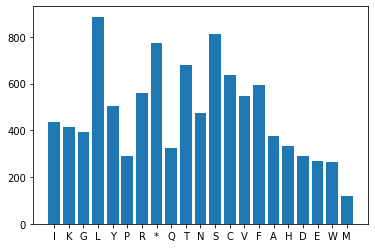

In [477]:
# Plot the Amino Acids of COVID-19

aa = df[df.name=='COVID19'].aa_freq.values[0]
plt.bar(aa.keys(), aa.values())

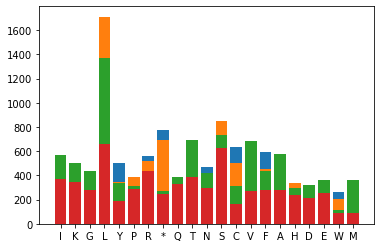

In [485]:
# All viruses -- same chart (not stacked)

for virus in df.name:
    aa = df[df.name==virus].aa_freq.values[0]
    plt.bar(aa.keys(), aa.values())
plt.show()

### Dot Plots of Opening Sequences

In [480]:
# COVID and MERS
dotplot(covid_seq[0:10],mers_seq[0:10])

 |GATTTAAGTG
------------
A| ■   ■■   
T|  ■■■   ■ 
T|  ■■■   ■ 
A| ■   ■■   
A| ■   ■■   
A| ■   ■■   
G|■      ■ ■
G|■      ■ ■
T|  ■■■   ■ 
T|  ■■■   ■ 


In [482]:
# COVID and SARS
n = 10
dotplot(covid_seq[0:n],sars_seq[0:n])

 |ATATTAGGTT
------------
A|■ ■  ■    
T| ■ ■■   ■■
T| ■ ■■   ■■
A|■ ■  ■    
A|■ ■  ■    
A|■ ■  ■    
G|      ■■  
G|      ■■  
T| ■ ■■   ■■
T| ■ ■■   ■■


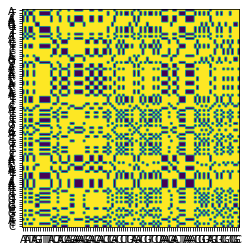

In [483]:
# Plotting function to illustrate deeper matches

def dotplotx(seq1, seq2, n):
    seq1=seq1[0:n]
    seq2=seq2[0:n]
    plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
    # on x-axis list all sequences of seq 2
    xt=plt.xticks(np.arange(len(list(seq2))),list(seq2))
    # on y-axis list all sequences of seq 1
    yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
    plt.show()
    
dotplotx(covid_seq, sars_seq, n=100)

Notice the large diagonal line for the second half of the first 100 nucleotides - indicating these are the same for `COVID19` and `SARS`

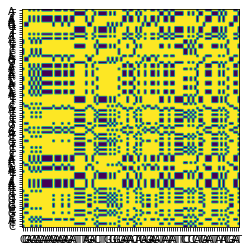

In [484]:
dotplotx(covid_seq, ebola_seq, n=100)

No corresponding matches for `EBOLA` and `COVID`

#### Calculate Pairwise Alignment for the First 100 Nucleotides


In [528]:

def pairwise_alignment(s1, s2, n):
    if n == 'full': n = min(len(s1), len(s2))
    alignment = pairwise2.align.globalxx(s1[0:n], s2[0:n], one_alignment_only=True, score_only=True)
    print(f'Pairwise alignment: {alignment:.0f}/{n} ({(alignment/n)*100:0.1f}%)')

    
# SARS and COVID 
pairwise_alignment(covid_seq, sars_seq, n=100)

Pairwise alignment: 89/100 (89.0%)


In [529]:
pairwise_alignment(covid_seq, sars_seq, n=10000)

Pairwise alignment: 7895/10000 (79.0%)


In [530]:
pairwise_alignment(covid_seq, sars_seq, n=len(sars_seq))

Pairwise alignment: 24654/29751 (82.9%)


* `82.9`% of the COVID19 genome is exactly the same as SARS

In [531]:
pairwise_alignment(covid_seq, mers_seq, n='full')

Pairwise alignment: 20778/29903 (69.5%)


In [532]:
pairwise_alignment(covid_seq, ebola_seq, n='full')

Pairwise alignment: 12377/18959 (65.3%)


* `COVID19` and `SARS` have a `82.9`% similarity. Both are of the same genus and belong to `Sars_Cov`.
* `COVID19` and `EBOLA` have a `65.3`% similarity since they are from a different family of virus

### Example of the Opening Sequence of `COVID19` and `SARS`
Sequencing found similar structure from `40:100` so lets use our functions to visualise it.

Similarity matrix (look for diagonal)


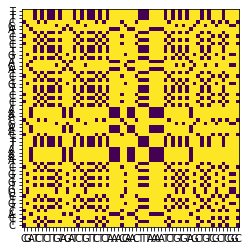

Possible alignment pathways: 

TTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTG-GCTGTCA-CTC---
   ||||||||||||||||||||||||||||||||||||||||||||||  ||||||  |||   
---CGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGT-AGCTGTC-GCTCGGC
  Score=55
 
TTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCA-CTC---
   ||||||||||||||||||||||||||||||||||||||||||||||.||||||  |||   
---CGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTAGCTGTC-GCTCGGC
  Score=55
 
TTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGT-GGCTGTCA-CTC---
   |||||||||||||||||||||||||||||||||||||||||||||| | |||||  |||   
---CGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTAG-CTGTC-GCTCGGC
  Score=55
 
TTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTG-GCTGTCACTC---
   ||||||||||||||||||||||||||||||||||||||||||||||  ||||||.|||   
---CGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGT-AGCTGTCGCTCGGC
  Score=55
 
TTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC---
   ||||||||||||||||||||||||||||||||||||||||||||||.||||||.|||   
---

In [550]:
s1 = covid_seq[40:100]
s2 = sars_seq[40:100]

print('Similarity matrix (look for diagonal)')
dotplotx(s1, s2, n=100)

print('Possible alignment pathways: \n\n')
hammer_time(s1, s2, verbose=False)